**Dimensionality Reduction**



Reducing the high dimensionality of the dataset

**1. Feature Elimination**
      Which features are not neccessary we can remove

**2. Feature Extraction**
    Transforming the M number of columns into N number of columns here 
    N < M

**Principal Component Analysis**

PCA is a technique for feature extraction

In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

**Loading the breast cancer dataset**

In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [29]:
cancer_df = pd.DataFrame(cancer['data'])
cancer_df['target'] = cancer['target']
cancer_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


**How many samples for class 1 and how many for class 0?**

In [30]:
cancer_df['target'].unique()

array([0, 1], dtype=int64)

In [31]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [32]:
cancer_df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29, 'target'],
      dtype='object')

In [33]:
cancer_df.columns[:-1]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='object')

In [34]:
X = cancer_df[cancer_df.columns[:-1]]
X.shape

(569, 30)

In [35]:
y = cancer_df['target']
y.shape

(569,)

**Now we need to standardizing the data**


Making all features or columns into one standard scale



In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
# creating object for standard scaler
scaler = StandardScaler()
# transform the data for standardisation
X_transformed = scaler.fit_transform(X)


In [39]:
df2 = pd.DataFrame(X_transformed)
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


**importing PCA**

In [40]:
from sklearn.decomposition import PCA

In [41]:
# create object for pca by providing number of companents(features)
pcaObj = PCA(n_components=2)

In [42]:
pca_cancer_data = pcaObj.fit_transform(X_transformed)
# converting pca_cancer_data array into df
cancer_df_pca = pd.DataFrame(pca_cancer_data)
cancer_df_pca.head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [43]:
pcaObj.explained_variance_ratio_ *100

array([44.27202561, 18.97118204])

In [44]:
cancer_df_pca.shape

(569, 2)

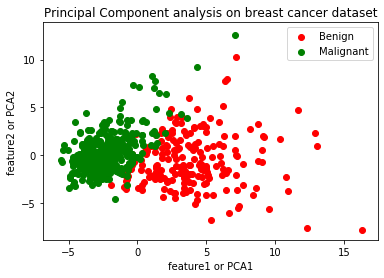

In [45]:
plt.figure()
plt.xlabel('feature1 or PCA1')
plt.ylabel('feature2 or PCA2')
plt.title('Principal Component analysis on breast cancer dataset')
targets = {0:'Benign',1:'Malignant'}
colors = ['r','g']
for target,color in zip(targets,colors):
    indicesToKeep = cancer_df['target'] == target
    plt.scatter(
        cancer_df_pca.loc[indicesToKeep,0],
        cancer_df_pca.loc[indicesToKeep,1],
        c = color
    )
plt.legend(targets.values())
plt.show()



In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
cancer_df_pca.head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [48]:
X = cancer_df_pca[[0,1]]
X.shape

(569, 2)

In [50]:
y = cancer_df['target']
y.shape

(569,)

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.score(X,y)

0.9525483304042179

**Revision from starting day**

### Day1
    1. introduction to ML
    2. Types of ML
    3. Steps to solve ML problem
    4. Applications of ML
    5. Linear regression for employee experience and salary dataset
### Day2
    1. Linear regression for realtime dataset (boston dataset)
    2. Polynomial features for Non-Linear Regression
#### Day3
    1. Knn introduction
    2. Applying knn for iris dataset
#### Day4
    1. Logistic Regression(Classification)
    2. iris datasets
    3. Decision Tree classifier
    4. iris dataset
#### Day5
    1. Introduction to unsupervised learning
    2. Kmeans clustering for iris dataset
#### Day6
    1. Dimensionality Reduction
    2. Principal Component Analysis for feature extraction

**https://www.kaggle.com/**

**http://machinelearningmastery.com/**

**https://towardsdatascience.com/**

**https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/**

https://github.com/AP-State-Skill-Development-Corporation/Machine-Learning-Using-Python-MB1

**Videos  auto expire after 10days(28july2020)**